In [ ]:
requires = ['numpy']

In [ ]:
import pip

installed_packages = pip.get_installed_distributions()
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])

matching = [[libs for libs in installed_packages_list if x in libs] for x in requires]
print matching

In [ ]:
!make oc

In [ ]:
!make interface

In [ ]:
requires = ['libocpy','liboctq.mod','liboceqplus.mod','liboctq.mod']

In [ ]:
import os

files = os.listdir(".")
matching = filter(None, [[fs for fs in files if x in fs] for x in requires])
print matching

if len(matching) == len(requires):
    print "requirement fullfilled"
else:
    print "something is missing"

##import OC python interface

In [1]:
from libocpy import *

## initiate OC 

In [2]:
tqini()

## read the database with selected element(s)

In [3]:
tqrpfil('FENI.TDB',('FE','NI'))

## DEMO: the name of all the loaded elements

In [ ]:
element_name = tqgcom()
print "element name:  ",element_name

##number of phases

In [ ]:
number_phase = tqgnp()
print "# of phases:   ",number_phase

##name of the phases

In [ ]:
phase_name = tqgpn()
print "phase name:  ",phase_name

##DEMO: phase index

In [ ]:
phase_index = tqgpi('liq')
print "phase index:  ",phase_index

##change phase status

In [ ]:
tqphsts("*","SUS",0.)
tqphsts("FCC","ENT",1.)

##setup conditions

In [4]:
tqsetc('N',0,1.)
tqsetc('P',0,1E5)
tqsetc('T',0,900.)

tqsetc('X','NI',0.1)

##equalibrium calculation

In [5]:
tqce()

##DEMO: get results from calculation -- molar free energy

In [6]:
GM = tqgetv('GM','FCC','NA')
print GM

-39246.3265471


In [30]:
import numpy as np

T = np.linspace(300,1500,100)
GM_FCC = []
GM_BCC = []
GM_LIQ = []

for i in range(len(T)):
    tqsetc('T',0,T[i])
    tqce()
    
    GM_FCC.append(tqgetv('GM','FCC','NA'))
    GM_BCC.append(tqgetv('GM','BCC','NA'))
    GM_LIQ.append(tqgetv('GM','LIQ','NA'))
    

In [16]:
# http://matplotlib.org/
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline


In [31]:
tc_fcc = np.loadtxt('tc/fcc.dat')
tc_bcc = np.loadtxt('tc/bcc.dat')
tc_liq = np.loadtxt('tc/liq.dat')

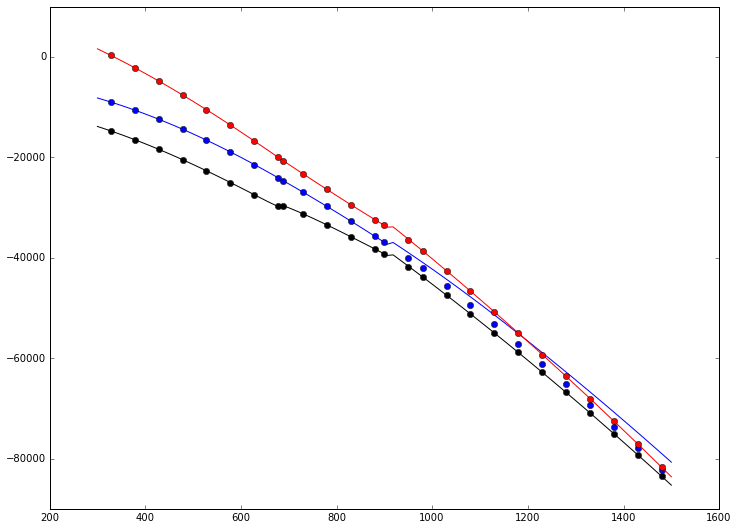

In [41]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(T,GM_FCC,c='k')
ax.plot(tc_fcc[:,0],tc_fcc[:,1],'o',c='k',markevery=5)
#ax.plot(tc_fcc[:,0],tc_fcc[:,1])
ax.plot(T,GM_BCC,c='b')
ax.plot(tc_bcc[:,0],tc_bcc[:,1],'o',c='b',markevery=5)
#ax.plot(tc_bcc[:,0],tc_bcc[:,1])
ax.plot(T,GM_LIQ,c='r')
ax.plot(tc_liq[:,0],tc_liq[:,1],'o',c='r',markevery=5)
#ax.plot(tc_liq[:,0],tc_liq[:,1])


plt.show()

##reset error

In [ ]:
tqrseterr()